# Statistiques

## Analyse Histogramme: 

Le SPC (Statistical Process Control, ou Contrôle Statistique de Processus en français) est une technique utilisée pour surveiller et contrôler la qualité d'un processus de production en utilisant des outils statistiques. Il existe plusieurs types d'analyses statistiques qui peuvent être utilisées dans le cadre du SPC, notamment :

**L'analyse des écarts** : cette analyse consiste à mesurer l'écart entre la valeur réelle d'un paramètre et sa valeur cible, afin de détecter les écarts significatifs qui pourraient indiquer un problème dans le processus.

**L'analyse de tendance** : cette analyse permet de suivre l'évolution d'un paramètre au fil du temps, afin de détecter des tendances qui pourraient indiquer un problème à venir.

**L'analyse des variations** : cette analyse consiste à mesurer la variabilité d'un paramètre dans le temps, afin de déterminer si le processus est stable ou instable.

**L'analyse des limites de contrôle** : cette analyse permet de déterminer si les variations d'un paramètre sont normales ou anormales, en utilisant des limites de contrôle définies à partir de données historiques.

Il existe également d'autres types d'analyses statistiques qui peuvent être utilisées dans le cadre du SPC, comme l'analyse de la capacité du processus ou l'analyse de la stabilité du processus.



## DataFrame 

In [10]:
import pandas as pd

df = pd.DataFrame({
    'Date': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09'],
    'Température': [22, 23, 24, 25, 24, 23, 22, 21, 20],
    'Humidité': [75, 72, 78, 82, 76, 78, 65, 45, 55]
})
print(df)

         Date  Température  Humidité
0  2020-01-01           22        75
1  2020-01-02           23        72
2  2020-01-03           24        78
3  2020-01-04           25        82
4  2020-01-05           24        76
5  2020-01-06           23        78
6  2020-01-07           22        65
7  2020-01-08           21        45
8  2020-01-09           20        55


## Affichage Histogramme

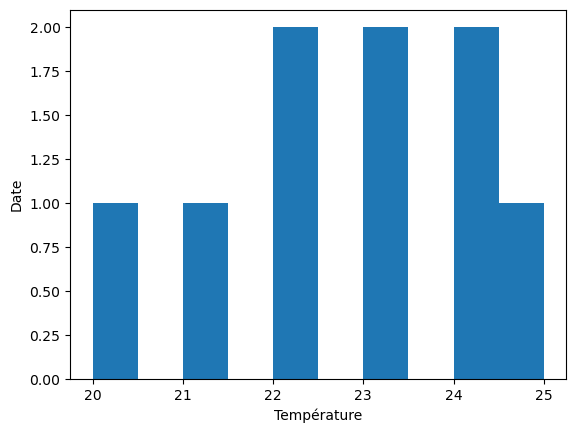

In [11]:
import matplotlib.pyplot as plt

# On sélectionne la colonne "Température" du data frame
df_date = df['Date'] 
df_humidities = df['Humidité']
df_temperatures = df['Température']

# On crée l'histogramme
# plt.hist(df_temperatures, bins=1)
plt.hist(df_temperatures, bins=10)

# On ajoute des étiquettes aux axes
plt.xlabel('Température')
plt.ylabel('Date')

# On affiche l'histogramme
plt.show()


## Affichage moy, sigma, ucl, lcl

mean = 21.00
std = 1.33
ucl = 25.00
lcl = 17.00


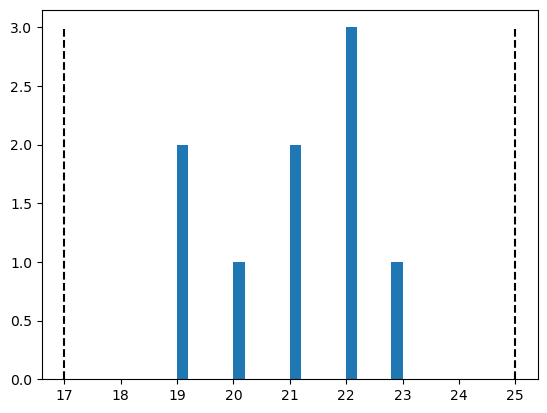

cp = 1.00
cpk = 1.00
sigma = 0.06


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Récupération des données de température
temperatures = df['Température'].values

# Calcul des statistiques de base
mean = np.mean(temperatures)
std = np.std(temperatures)

# Détermination des limites de contrôle
ucl = mean + 3*std
lcl = mean - 3*std

print(f"mean = {mean:.2f}")
print(f"std = {std:.2f}")
print(f"ucl = {ucl:.2f}")
print(f"lcl = {lcl:.2f}")


# Création de l'histogramme
plt.hist(temperatures, bins=20)

# Ajout des limites de contrôle
plt.plot([lcl, lcl], [0, 3], '--', color='k')
plt.plot([ucl, ucl], [0, 3], '--', color='k')

plt.show()

# Calcul du cp et du cpk
cp = (ucl - lcl) / (6 * std)
cpk = (ucl - mean) / (3*std)

print(f"cp = {cp:.2f}")
print(f"cpk = {cpk:.2f}")

# Calcul du sigma
sigma = std / mean
print(f"sigma = {sigma:.2f}")


## **Courbe de lissage d'un histogramme**

Voici un exemple de code Python qui peut être utilisé pour afficher une courbe lissée sur un histogramme :
Ce code utilise d'abord Matplotlib pour créer un histogramme à partir des données, puis il utilise NumPy pour calculer les valeurs de l'histogramme et les centres des bins. Le code utilise ensuite la librairie SciPy pour calculer une courbe lissée des valeurs de l'histogramme, en utilisant l'algorithme de spline cubique. Enfin, le code ajoute la courbe lissée sur le graphique de l'histogramme en utilisant Matplotlib, et affiche le résultat à l'écran. N'hésitez pas à consulter la documentation de Matplotlib et de SciPy pour en savoir plus sur les différentes options disponibles.

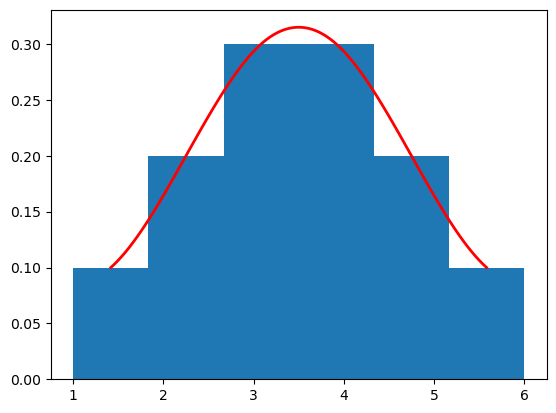

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Récupération des données
data = [1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6]

# Création de l'histogramme
plt.hist(data, bins=6, density=True)

# Calcul des valeurs de l'histogramme
hist, edges = np.histogram(data, bins=6, density=True)
bin_centers = 0.5*(edges[:-1] + edges[1:])

# Calcul de la courbe lissée
from scipy.interpolate import make_interp_spline, BSpline

spl = make_interp_spline(bin_centers, hist, k=3)
x_new = np.linspace(bin_centers.min(), bin_centers.max(), 100)
y_new = spl(x_new)

# Ajout de la courbe lissée sur le graphique
plt.plot(x_new, y_new, 'r-', lw=2)

# Affichage de l'histogramme
plt.show()


## Affichage diagramme sigma
Voici un exemple de code Python qui peut être utilisé pour afficher le diagramme sigma d'un histogramme :
Ce code utilise d'abord NumPy pour calculer la moyenne et l'écart-type des données, puis il utilise Matplotlib pour créer un histogramme des données. Le code ajoute ensuite le diagramme sigma sur le graphique en utilisant Matplotlib, en dessinant des lignes en pointillé aux positions correspondant aux différents niveaux de sigma.

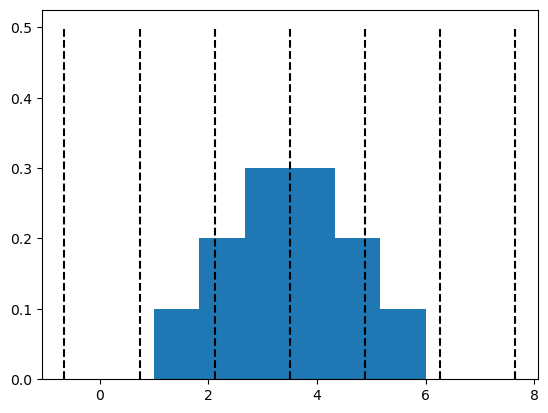

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Récupération des données
data = [1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6]

# Calcul de la moyenne et de l'écart-type des données
mean = np.mean(data)
std = np.std(data)

# Création de l'histogramme
plt.hist(data, bins=6, density=True)

# Ajout du diagramme sigma sur le graphique
plt.plot([mean - 3*std, mean - 3*std], [0, 0.5], '--', color='k')
plt.plot([mean - 2*std, mean - 2*std], [0, 0.5], '--', color='k')
plt.plot([mean - std, mean - std], [0, 0.5], '--', color='k')
plt.plot([mean, mean], [0, 0.5], '--', color='k')
plt.plot([mean + std, mean + std], [0, 0.5], '--', color='k')
plt.plot([mean + 2*std, mean + 2*std], [0, 0.5], '--', color='k')
plt.plot([mean + 3*std, mean + 3*std], [0, 0.5], '--', color='k')

# Affichage de l'histogramme
plt.show()


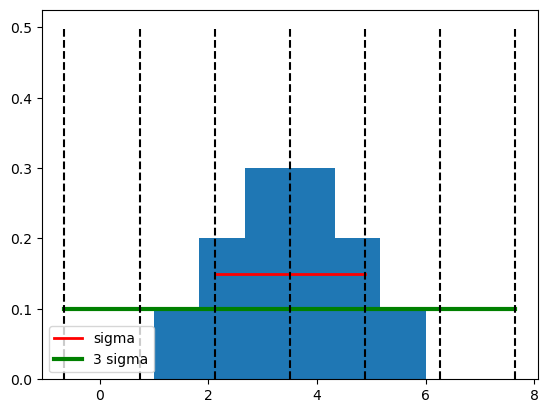

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Récupération des données
data = [1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6]

# Calcul de la moyenne et de l'écart-type des données
mean = np.mean(data)
std = np.std(data)

# Création de l'histogramme
plt.hist(data, bins=6, density=True)

# Ajout de la ligne horizontale 2 sigma avec labels et couleurs
# plt.plot([mean - 2*std, mean + 2*std], [0.25, 0.25], '--', color='k')
plt.plot([mean - std, mean + std], [0.15, 0.15], 'r-', lw=2, label='sigma')

plt.plot([mean - 3*std, mean + 3*std], [0.10, 0.10], 'g-', lw=3, label='3 sigma')

# Affichage de l'étiquette de la ligne sur le graphique
plt.legend()

# Ajout du diagramme sigma sur le graphique
plt.plot([mean - 3*std, mean - 3*std], [0, 0.5], '--', color='k')
plt.plot([mean - 2*std, mean - 2*std], [0, 0.5], '--', color='k')
plt.plot([mean - std, mean - std], [0, 0.5], '--', color='k')
plt.plot([mean, mean], [0, 0.5], '--', color='k')
plt.plot([mean + std, mean + std], [0, 0.5], '--', color='k')
plt.plot([mean + 2*std, mean + 2*std], [0, 0.5], '--', color='k')
plt.plot([mean + 3*std, mean + 3*std], [0, 0.5], '--', color='k')


# Affichage de l'histogramme
plt.show()


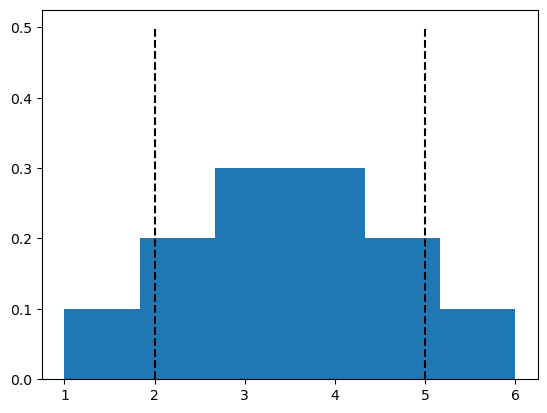

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Récupération des données
data = [1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6]

# Calcul de la moyenne et de l'écart-type des données
mean = np.mean(data)
std = np.std(data)

# Valeurs de tolerance min et max
tol_min = 2
tol_max = 5

# Création de l'histogramme
plt.hist(data, bins=6, density=True)

# Ajout des tolerances min et max sur le graphique
plt.plot([tol_min, tol_min], [0, 0.5], '--', color='k')
plt.plot([tol_max, tol_max], [0, 0.5], '--', color='k')

# Affichage de l'histogramme
plt.show()


## Colorie en orange les barres de l'histogrammme sup à ne valeur 

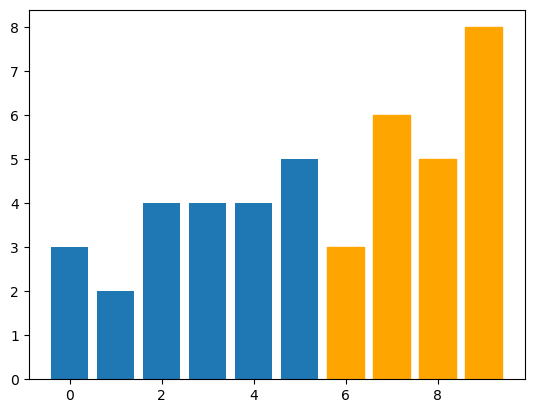

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données aléatoires
data = np.random.randint(0, 10, size=10)

# Création de l'histogramme
plt.bar(range(len(data)), data)

# Définition du seuil en abscisse
threshold = 5

# Mise en couleur orange des barres supérieures au seuil
for i, bar in enumerate(plt.gca().patches):
    if bar.get_x() > threshold:
        bar.set_color('orange')

# Affichage de l'histogramme
plt.show()


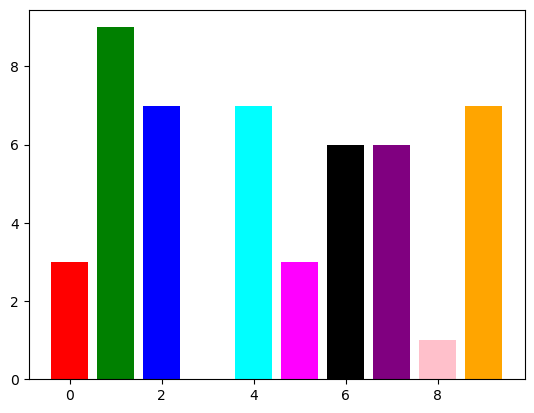

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données aléatoires
data = np.random.randint(0, 10, size=10)

# Création de l'histogramme
plt.bar(range(len(data)), data, color=['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'black', 'purple', 'pink', 'orange'])

# Affichage de l'histogramme
plt.show()


## mettre en orange les barres sup a tol min et max

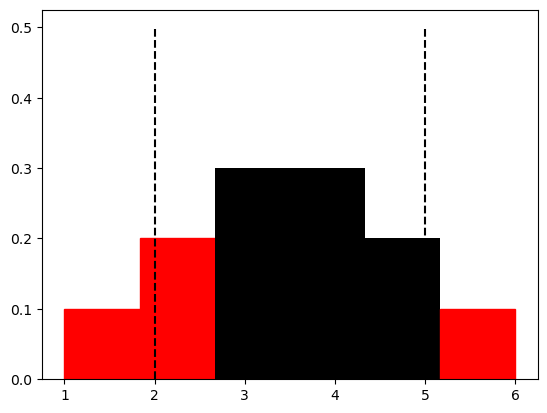

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Récupération des données
data = [1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6]

# Calcul de la moyenne et de l'écart-type des données
mean = np.mean(data)
std = np.std(data)

# Valeurs de tolerance min et max
tol_min = 2
tol_max = 5

# Création de l'histogramme
plt.hist(data, bins=6, density=True, color='k')

# Mise en couleur orange des barres supérieures au seuil
for i, bar in enumerate(plt.gca().patches):
    if bar.get_x() > tol_max:
        bar.set_color('red')
    if bar.get_x() < tol_min:
        bar.set_color('red')


# Boucle sur les barres de l'histogramme
# for i, patch in enumerate(bar_patches):
    # Si la valeur de la barre est supérieure à tol_max, la barre est coloriée en orange
  #  if bar_edges[i] > tol_max:
   #     patch.set_facecolor('orange')

# Ajout des tolerances min et max sur le graphique
plt.plot([tol_min, tol_min], [0, 0.5], '--', color='k')
plt.plot([tol_max, tol_max], [0, 0.5], '--', color='k')

# Affichage de l'histogramme
plt.show()


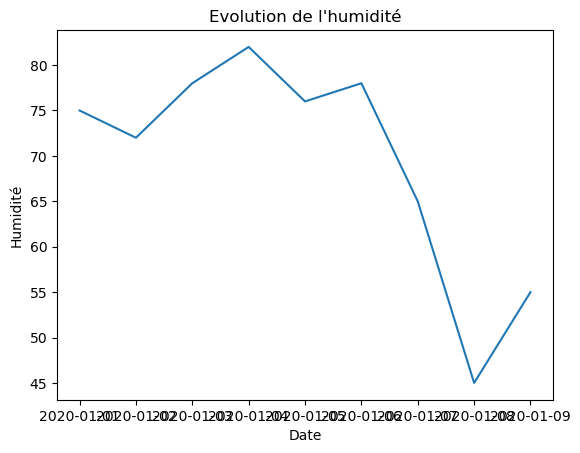

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Création du DataFrame
df = pd.DataFrame({
    'Date': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09'],
    'Humidité': [75, 72, 78, 82, 76, 78, 65, 45, 55]
})

# Conversion de la colonne 'Date' en format de date
df['Date'] = pd.to_datetime(df['Date'])

# Tri des données par date
df.sort_values(by='Date', inplace=True)

# Création de la courbe
plt.plot(df['Date'], df['Humidité'])

# Ajout d'un titre et de labels aux axes
plt.title('Evolution de l\'humidité')
plt.xlabel('Date')
plt.ylabel('Humidité')

# Affichage de la courbe
plt.show()


## afficher une courbe de temperature avec 1 etiquette sur x

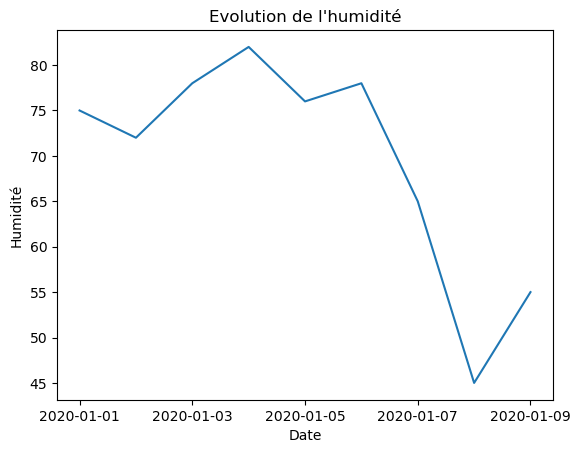

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Création du DataFrame
df = pd.DataFrame({
    'Date': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09'],
    'Humidité': [75, 72, 78, 82, 76, 78, 65, 45, 55]
})

# Conversion de la colonne 'Date' en format de date
df['Date'] = pd.to_datetime(df['Date'])

# Tri des données par date
df.sort_values(by='Date', inplace=True)

# Création de la courbe
plt.plot(df['Date'], df['Humidité'])

# Ajout d'un titre et de labels aux axes
plt.title('Evolution de l\'humidité')
plt.xlabel('Date')
plt.ylabel('Humidité')

# Configuration de l'affichage des étiquettes sur l'axe des abscisses
plt.xticks(df['Date'][::2])

# Affichage de la courbe
plt.show()


## afficher une courbe pleine de temperature

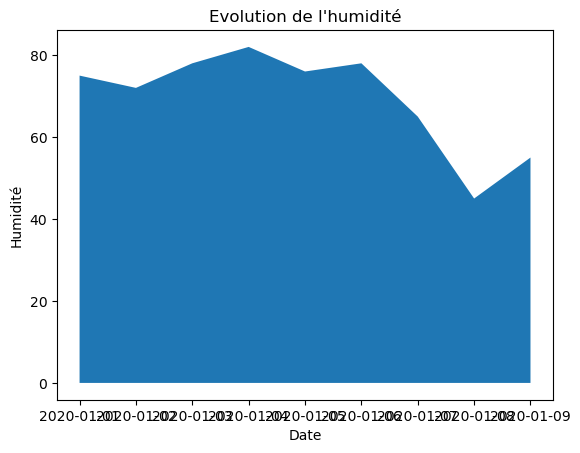

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Création du DataFrame
df = pd.DataFrame({
    'Date': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09'],
    'Humidité': [75, 72, 78, 82, 76, 78, 65, 45, 55]
})

# Conversion de la colonne 'Date' en format de date
df['Date'] = pd.to_datetime(df['Date'])

# Tri des données par date
df.sort_values(by='Date', inplace=True)

# Création de la courbe pleine
plt.fill_between(df['Date'], df['Humidité'])

# Ajout d'un titre et de labels aux axes
plt.title('Evolution de l\'humidité')
plt.xlabel('Date')
plt.ylabel('Humidité')

# Affichage de la courbe
plt.show()


## affiche courbe pleine avec couleurs min et max

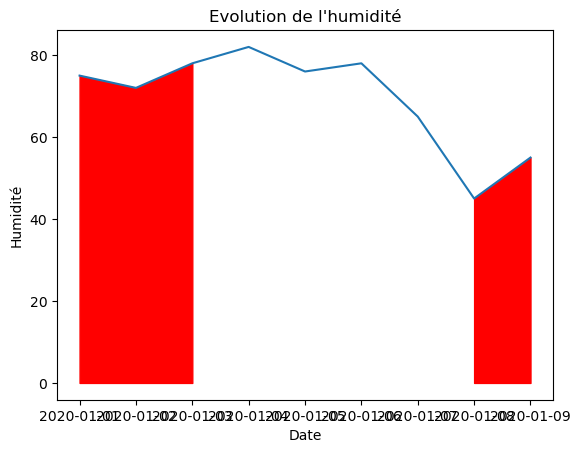

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Création du DataFrame
df = pd.DataFrame({
    'Date': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09'],
    'Humidité': [75, 72, 78, 82, 76, 78, 65, 45, 55]
})

# Conversion de la colonne 'Date' en format de date
df['Date'] = pd.to_datetime(df['Date'])

# Tri des données par date
df.sort_values(by='Date', inplace=True)

# Définition de la valeur de date en abscisse
threshold_min_date = pd.to_datetime('2020-01-04')
threshold_max_date = pd.to_datetime('2020-01-07')

# Création de la courbe
plt.plot(df['Date'], df['Humidité'])

# Création de la courbe pleine
plt.fill_between(df['Date'], df['Humidité'], where=df['Date'] > threshold_max_date, color='red')
plt.fill_between(df['Date'], df['Humidité'], where=df['Date'] < threshold_min_date, color='red')

# Ajout d'un titre et de labels aux axes
plt.title('Evolution de l\'humidité')
plt.xlabel('Date')
plt.ylabel('Humidité')

# Affichage de la courbe
plt.show()
